In [1]:
# Import libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
# filter and making copy of df assigning to new df
df_DA_DE = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Germany')].copy() 

In [9]:
# creating new column in df, reshaping posted_date to month number
df_DA_DE['job_posted_month_no'] = df_DA_DE['job_posted_date'].dt.month 

In [10]:
df_DA_DE_exploded = df_DA_DE.explode('job_skills')

In [ ]:
df_DA_DE_pivot = df_DA_DE_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_DE_pivot.loc['Total'] = df_DA_DE_pivot.sum()

df_DA_DE_pivot = df_DA_DE_pivot[df_DA_DE_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_DE_pivot = df_DA_DE_pivot.drop(labels='Total')


In [31]:
DA_totals = df_DA_DE.groupby(by='job_posted_month_no').size()

df_DA_DE_percent = df_DA_DE_pivot.div(DA_totals / 100, axis=0)

df_DA_DE_percent = df_DA_DE_percent.reset_index()
df_DA_DE_percent['job_posted_month'] = df_DA_DE_percent['job_posted_month_no'].apply(
  lambda x: pd.to_datetime(x, format='%m').strftime('%b')
)
df_DA_DE_percent = df_DA_DE_percent.set_index('job_posted_month')
df_DA_DE_percent = df_DA_DE_percent.drop(columns='job_posted_month_no')

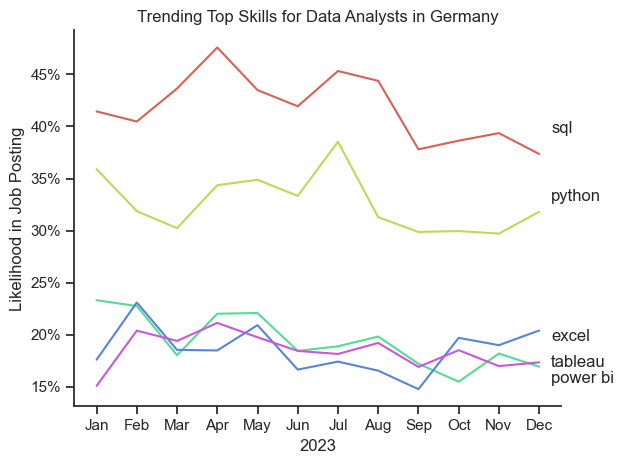

In [48]:
df_plot = df_DA_DE_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, palette='hls')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in Germany')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    y = df_plot.iloc[-1, i]
    offset = 2 - i  # vary offset to avoid overlap
    plt.text(11.3, y + offset, df_plot.columns[i])

plt.tight_layout()
plt.show()